In [1]:
import os
import pandas as pd
from PIL import Image

# List all image files
image_folder = "images"
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

# Extract metadata from filenames
image_data = []
for file in image_files:
    parts = file.split('_')
    unit_id = parts[0]
    sequence_id = parts[2].split('.')[0]
    image_data.append((file, unit_id, sequence_id))

# Create DataFrame and check for missing IDs
df_images = pd.DataFrame(image_data, columns=['filename', 'unit_id', 'sequence_id'])
df_images['sequence_id'] = pd.to_numeric(df_images['sequence_id'], errors='coerce')
full_range = set(range(11, 445))
present_ids = set(df_images['sequence_id'])
missing_ids = full_range - present_ids

# Summary
print(f"Total Images: {len(df_images)}")
print(f"Unique Images: {df_images['sequence_id'].nunique()}")
print(f"Missing Sequence IDs: {sorted(missing_ids)}")


Total Images: 427
Unique Images: 427
Missing Sequence IDs: [12, 14, 18, 19, 20, 21, 22]


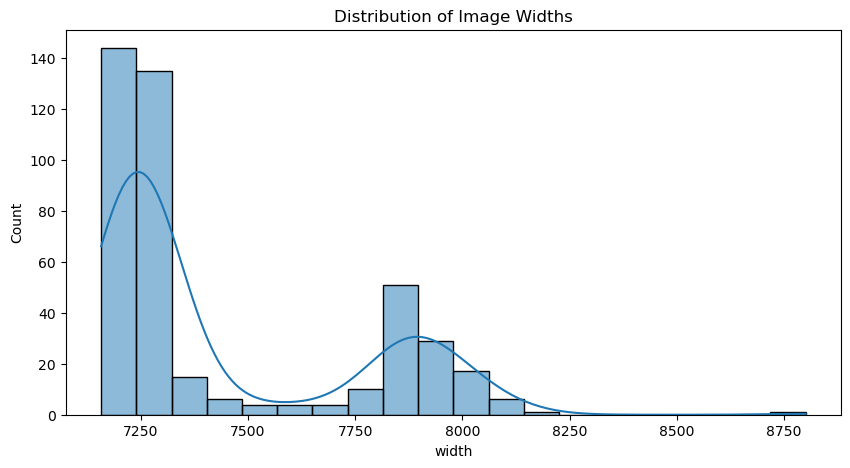

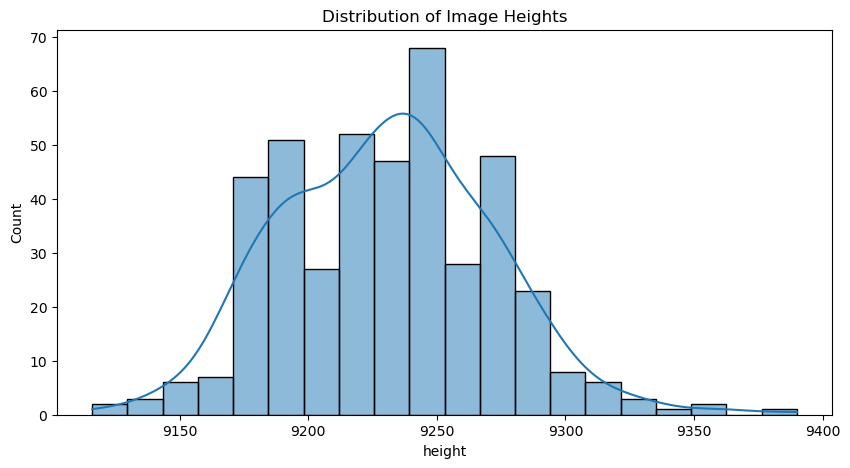

In [2]:
# Analyze image sizes
image_sizes = []
for file in df_images['filename']:
    with Image.open(os.path.join(image_folder, file)) as img:
        image_sizes.append(img.size)

df_images['width'], df_images['height'] = zip(*image_sizes)

# Plot distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_images['width'], bins=20, kde=True)
plt.title('Distribution of Image Widths')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df_images['height'], bins=20, kde=True)
plt.title('Distribution of Image Heights')
plt.show()


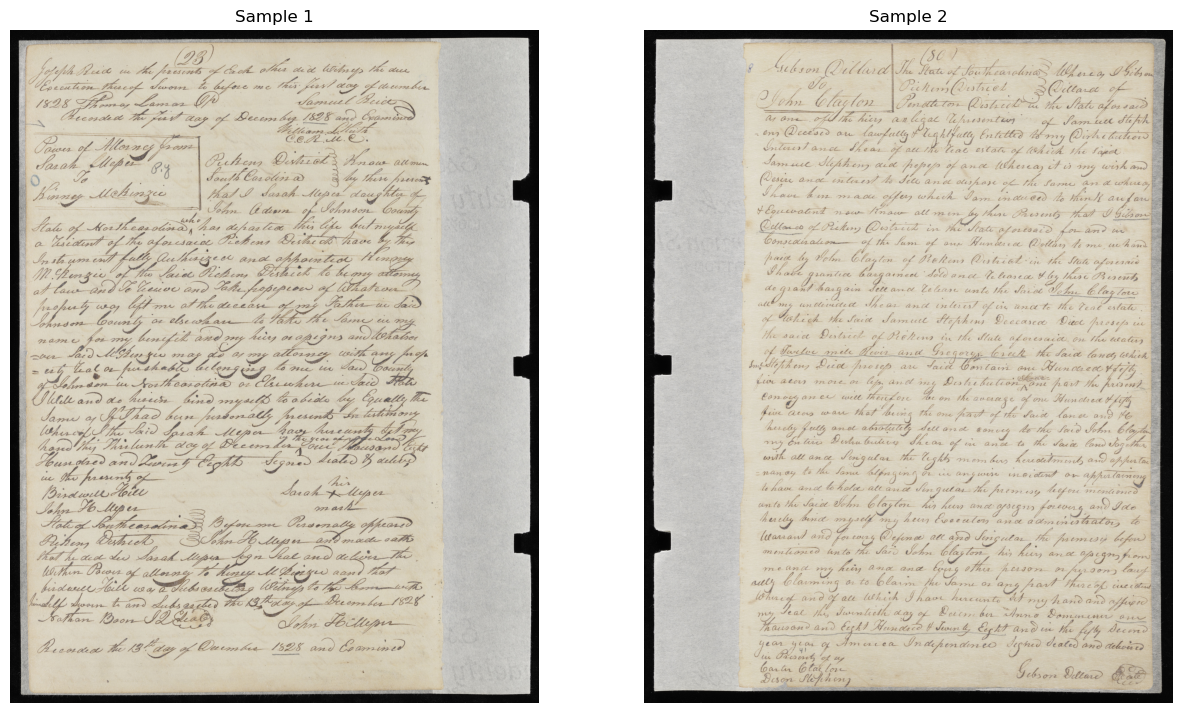

In [3]:
# Analyze image sizes
image_sizes = []
for file in df_images['filename']:
    with Image.open(os.path.join(image_folder, file)) as img:
        image_sizes.append(img.size)

df_images['width'], df_images['height'] = zip(*image_sizes)

import matplotlib.pyplot as plt
from PIL import Image

# Display random samples of images
sample_files = df_images['filename'].sample(2)
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
for i, file in enumerate(sample_files):
    img = Image.open(os.path.join(image_folder, file))
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Sample {i+1}")
    axes[i].axis('off')
plt.show()

In [4]:
# List all image files
image_folder = "compressed_images"
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

# Extract metadata from filenames
image_data = []
for file in image_files:
    parts = file.split('_')
    unit_id = parts[0]
    sequence_id = parts[2].split('.')[0]
    image_data.append((file, unit_id, sequence_id))

# Create DataFrame and check for missing IDs
df_images = pd.DataFrame(image_data, columns=['filename', 'unit_id', 'sequence_id'])
df_images['sequence_id'] = pd.to_numeric(df_images['sequence_id'], errors='coerce')

# Analyze image sizes
image_sizes = []
for file in df_images['filename']:
    with Image.open(os.path.join(image_folder, file)) as img:
        image_sizes.append(img.size)

df_images['width'], df_images['height'] = zip(*image_sizes)

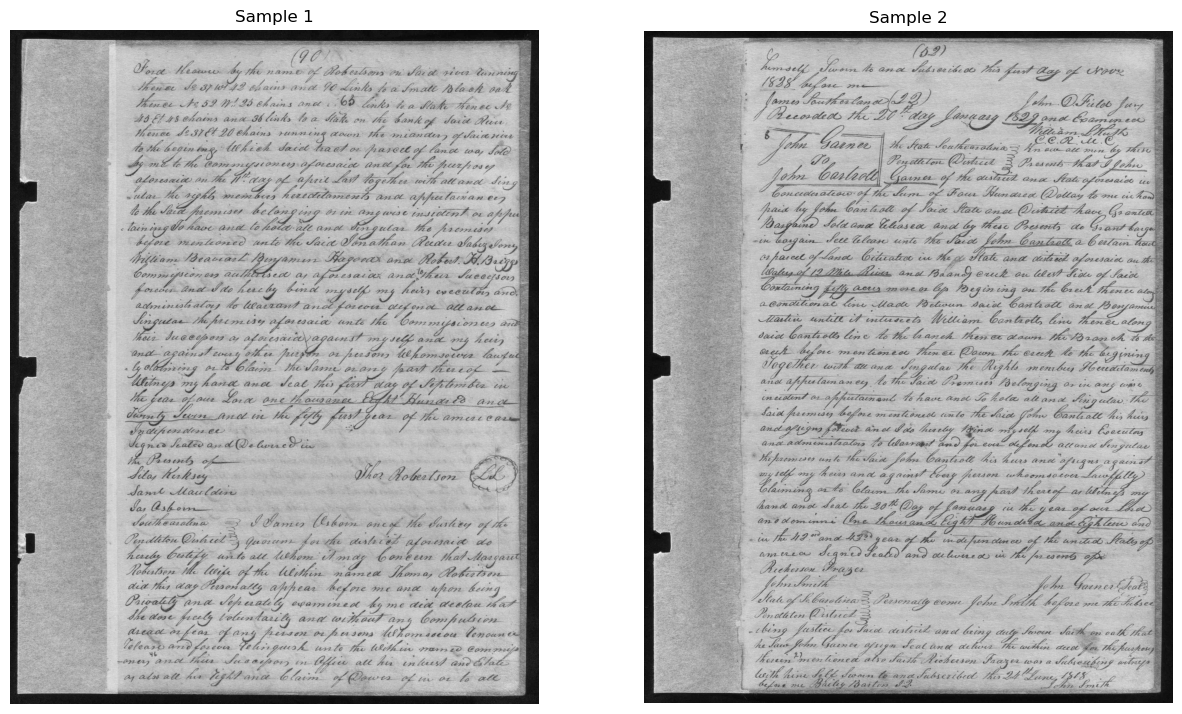

In [5]:
# Analyze image sizes
image_sizes = []
for file in df_images['filename']:
    with Image.open(os.path.join(image_folder, file)) as img:
        image_sizes.append(img.size)

df_images['width'], df_images['height'] = zip(*image_sizes)

import matplotlib.pyplot as plt
from PIL import Image

# Display random samples of images
sample_files = df_images['filename'].sample(2)
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
for i, file in enumerate(sample_files):
    img = Image.open(os.path.join(image_folder, file))
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Sample {i+1}")
    axes[i].axis('off')
plt.show()